<a href="https://colab.research.google.com/github/Akshaybhat5/Ad-Marketing-Customer_segmentation/blob/Master's/Ad_campaign_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, plot_roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import tensorflow as tf
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Activation, Input, Dense, Add

In [197]:
data_2 = pd.read_csv('Customer.csv')

In [84]:
data_2.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [85]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [86]:
data_2.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [92]:
data_2.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [93]:
data_2['CREDIT_LIMIT'] = data_2['CREDIT_LIMIT'].fillna(data_2['CREDIT_LIMIT'].mean())

In [94]:
data_2['MINIMUM_PAYMENTS'] = data_2['MINIMUM_PAYMENTS'].fillna(0)

In [95]:
data_2.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [191]:
def check_outliers(data):
    plt.figure(figsize=(20,65))
    for i in range(len(data.columns)):
        plt.subplot(17,1, i+1)
        sns.distplot(data[data.columns[i]],
                     kde_kws = {'color':'red','lw':3},
                     hist_kws = {'color':'black'})
        plt.title(data.columns[i])
    plt.tight_layout()

def heatmap(data, title):
    plt.figure(figsize = (20,15))
    sns.heatmap(data.corr(), annot=True)
    plt.title(title, weight='bold')
    plt.tight_layout()

def scatter_plot_for_variables(data, X, Y, title):
    plt.figure(figsize=(12,12))
    sns.scatterplot(data=data, x = X, y = Y)
    plt.title(title, weight='bold')
    plt.tight_layout()

def scaled_data_form(data):
    scaled_data = StandardScaler()
    data_scaled_2 = scaled_data.fit_transform(data)
    return data_scaled_2

def elbow_method(data):
    values = []
    num = range(1,20)
    for i in num:
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(data)
        values.append(kmeans.inertia_)
    return values

def draw_elbow_method(score,title):
    plt.figure(figsize=(10,5))
    plt.plot(score, 'bo-')
    plt.title(title, weight='bold')
    plt.xlabel('Clusters')
    plt.ylabel('WCSS')
    plt.tight_layout()

def principal_component_analysis(val, data):
    pca = PCA(n_components=val)
    values = pca.fit_transform(data)
    return values

def draw_clusters(data,vol):
    for i in data.columns:
        plt.figure(figsize = (25,5))
        for j in range(vol):
            plt.subplot(1, vol, j+1)
            cluster = data[data['cluster']==j]
            cluster[i].hist(bins=20)
            plt.title('{}\n{}'.format(i, j))
    plt.tight_layout()   

def data_with_clos(data, name_of_the_label):
    with_cluster = pd.concat([data, pd.DataFrame({'cluster':name_of_the_label})],axis = 1)
    return with_cluster     
        
def convert_pca_dataframe(data, name_of_the_values):
    dats = pd.concat([data, pd.DataFrame({'cluster':name_of_the_values})],axis=1)
    return dats

def plot_for_segmentation(dataa,X, Y, mon):
    plt.figure(figsize=(10,6))
    ask = input('enter the number of clusters: ')
    ask = int(ask)
    if ask == 8:
        sns.scatterplot(data=dataa, x = X, y  = Y, hue=mon, palette=['red','green','blue','black','yellow','maroon','pink','violet'])
        plt.title('CUSTOMER SEGMENTATION WITH {} CLUSTERS'.format(ask), weight='bold')
    elif ask == 4:
        sns.scatterplot(data=dataa, x = X, y  = Y, hue=mon, palette=['red','green','blue','black'])
        plt.title('CUSTOMER SEGMENTATION WITH {} CLUSTERS'.format(ask), weight='bold')

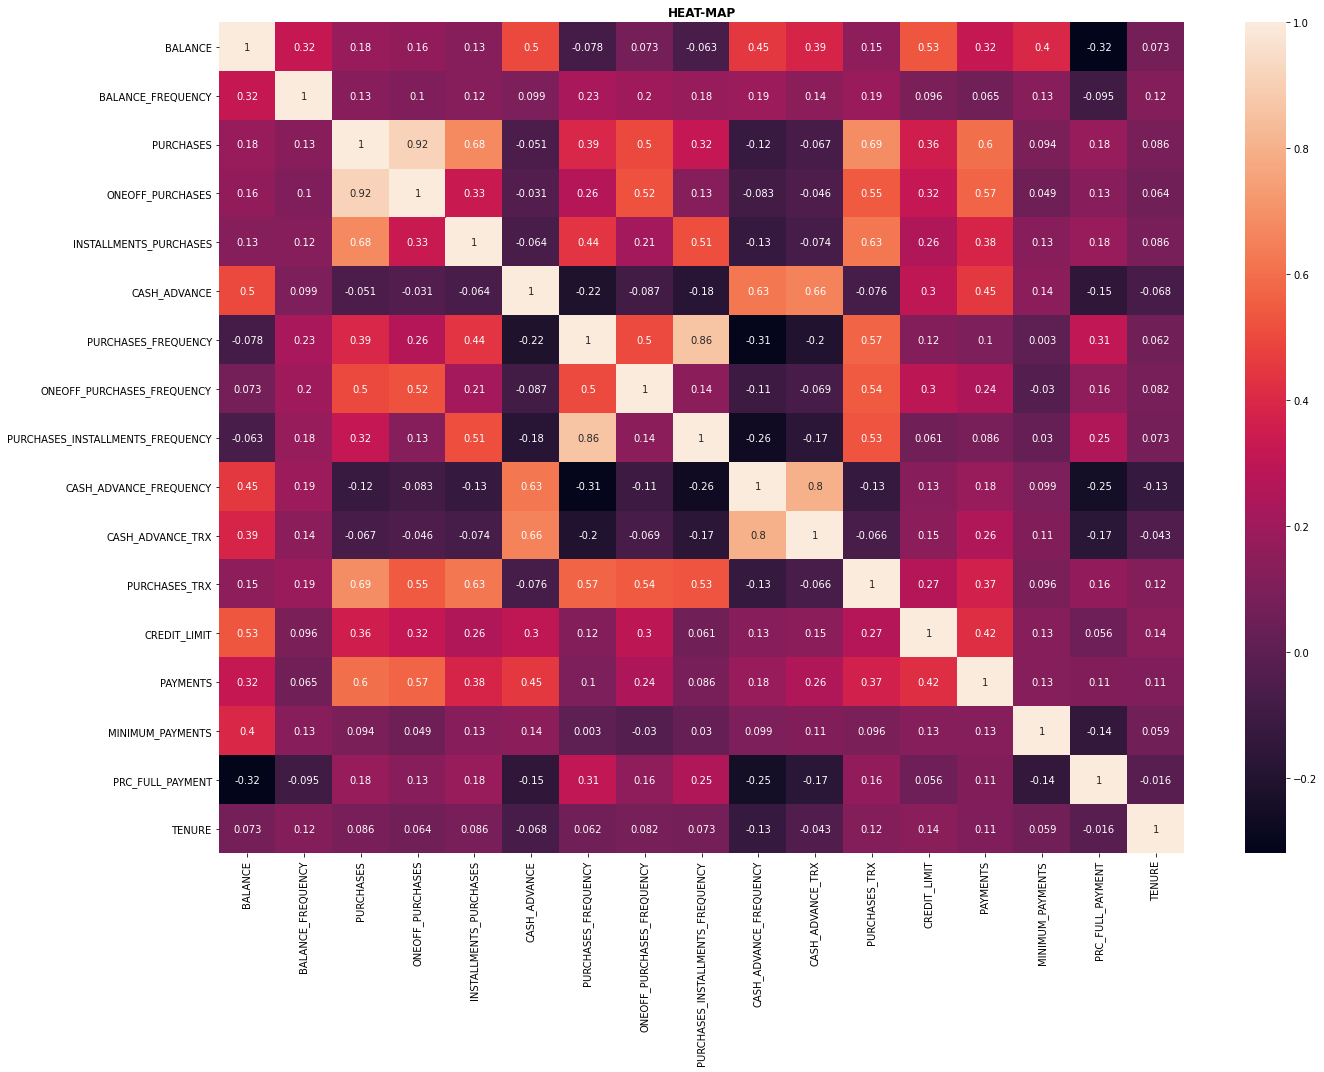

In [91]:
heatmap(data_2, 'HEAT-MAP')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

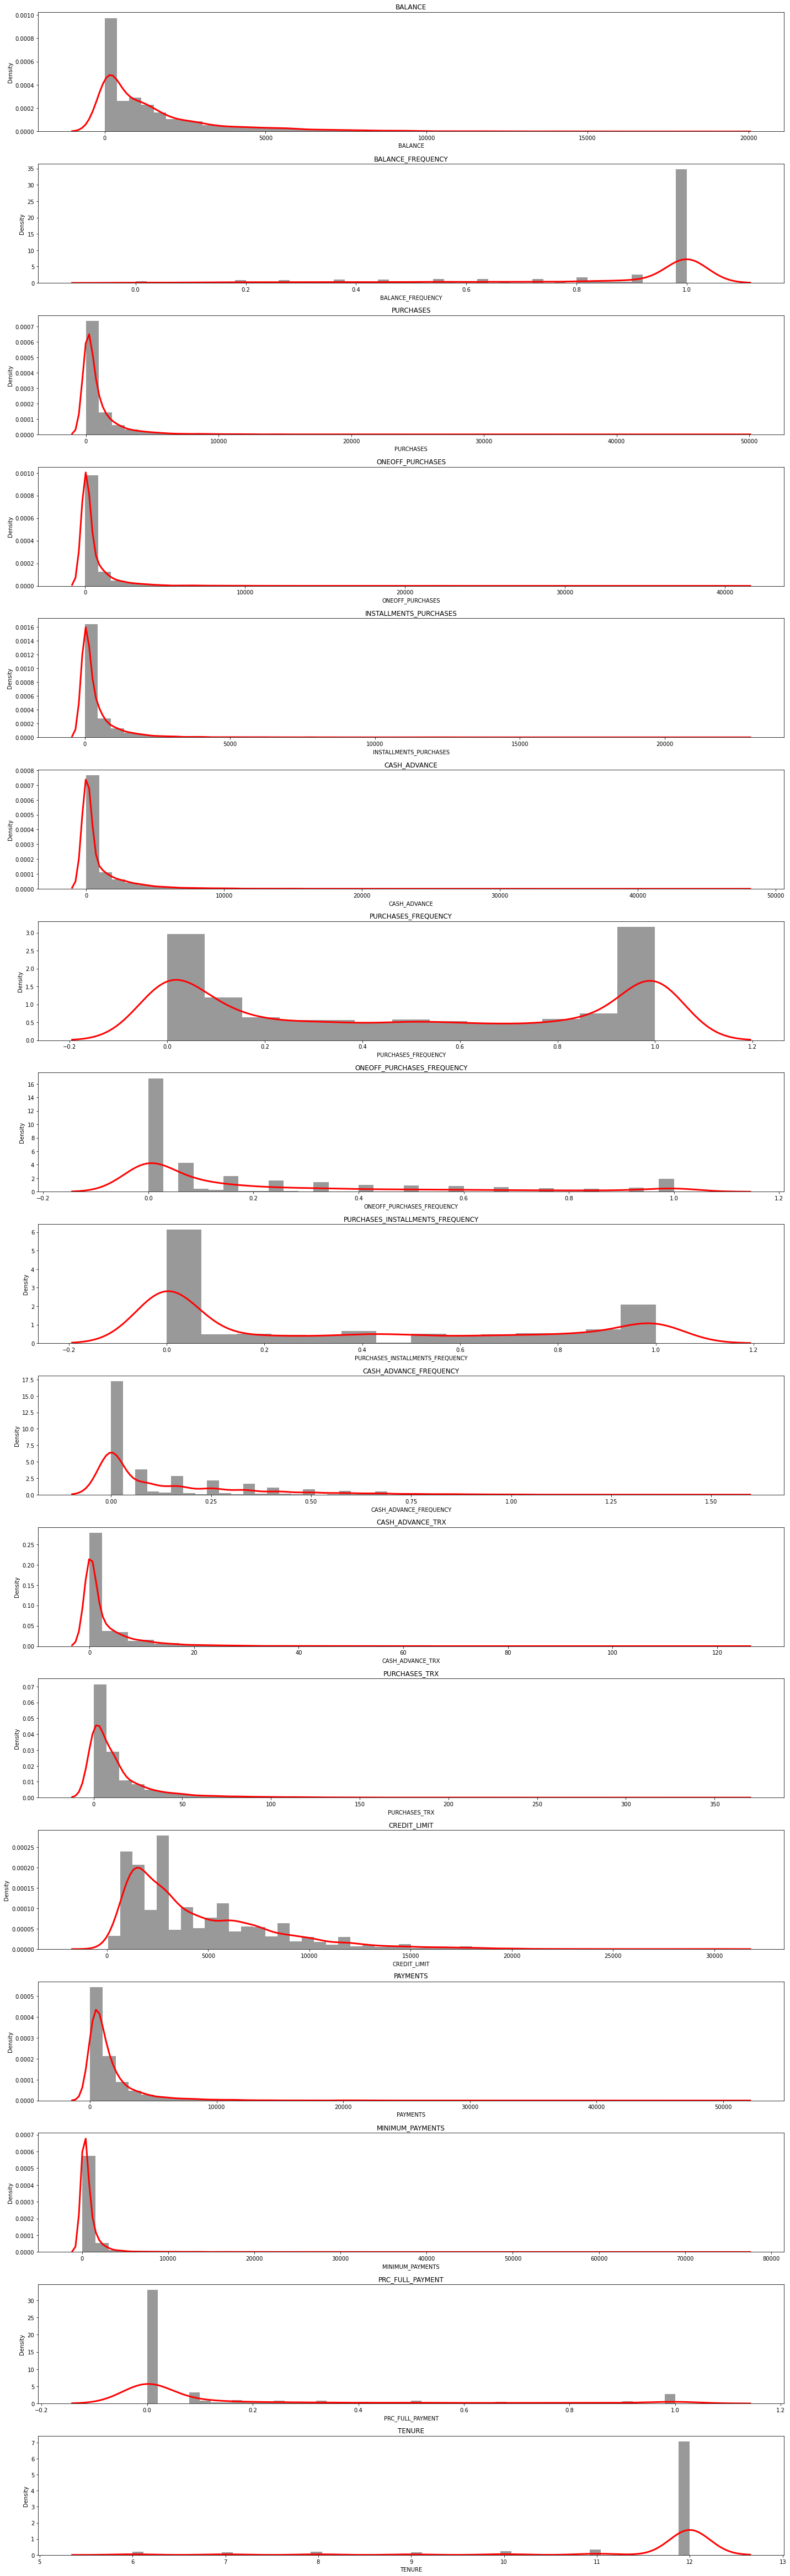

In [90]:
check_outliers(data_2)

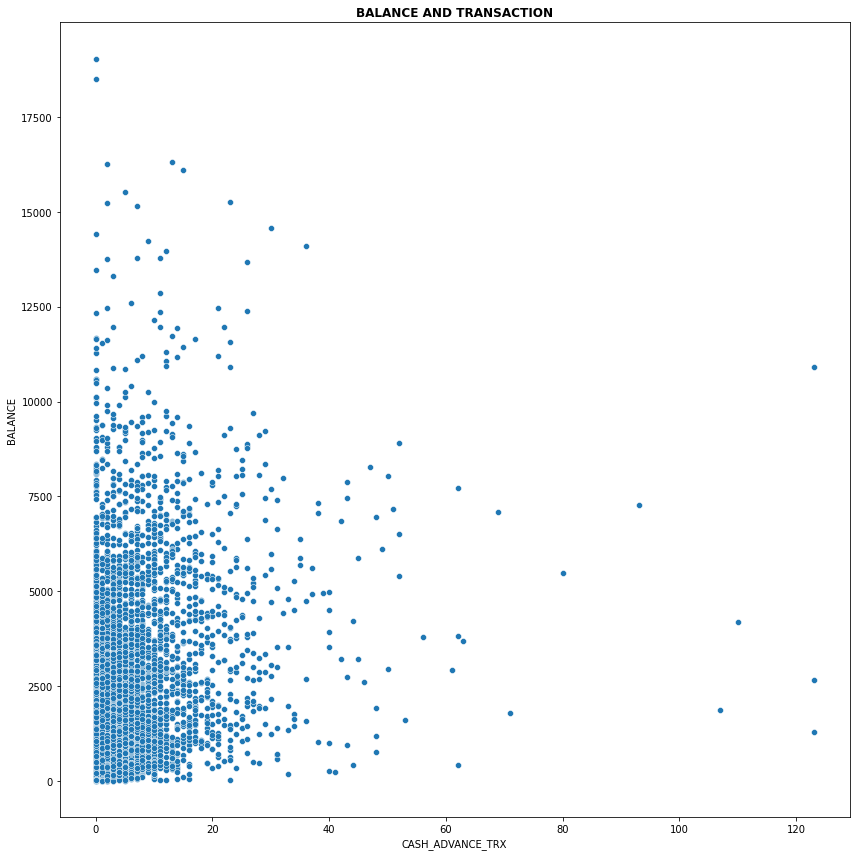

In [96]:
scatter_plot_for_variables(data_2,'CASH_ADVANCE_TRX','BALANCE','BALANCE AND TRANSACTION')

In [102]:
data_fully_scaled = scaled_data_form(data_2)

In [103]:
data_fully_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.2973097 ,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.10204243,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.08848934,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32175099,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.33316552,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.31923775,
        -0.52555097, -4.12276757]])

In [112]:
score_1 = elbow_method(data_2)

In [113]:
score_1

[393286580203.7055,
 279447583089.9705,
 232942058851.52805,
 206832131321.5537,
 181679466353.93408,
 161802101249.5383,
 145280619583.96417,
 132958101942.98941,
 124251317861.69893,
 116244513097.87206,
 109373374086.51094,
 104355495821.43376,
 98133407660.17653,
 94759626434.87453,
 91417988932.7386,
 88204829385.36339,
 84987389510.34775,
 82627242763.38873,
 79956792311.74518]

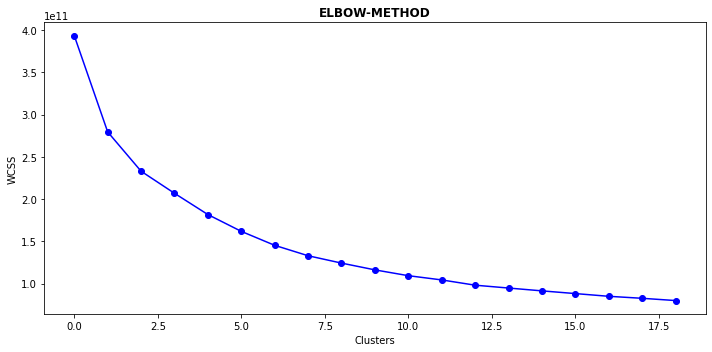

In [114]:
draw_elbow_method(score_1,'ELBOW-METHOD')

In [115]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(data_fully_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [116]:
labels = kmeans.labels_

In [117]:
labels

array([5, 1, 2, ..., 6, 6, 6], dtype=int32)

In [121]:
data_cluster = data_with_clos(data_2, labels)

In [122]:
data_cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,5
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12,5
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,0.000000,0.000000,6,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,6


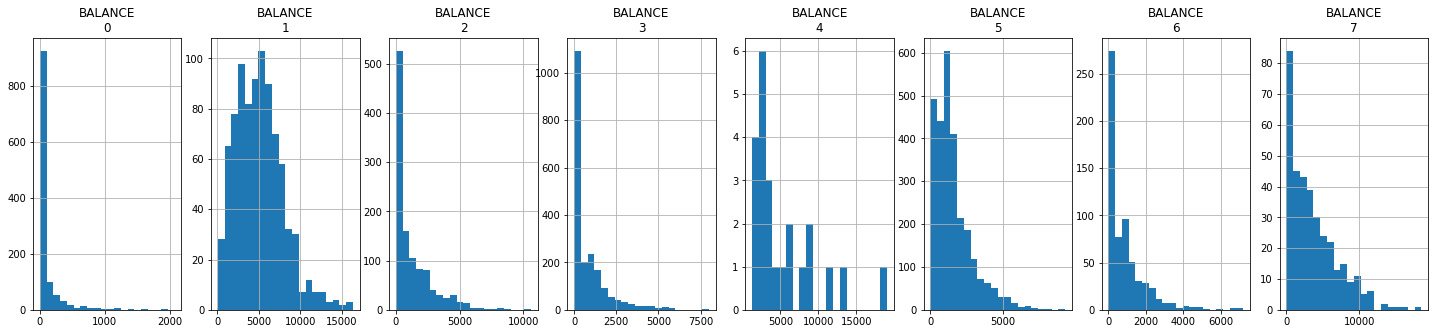

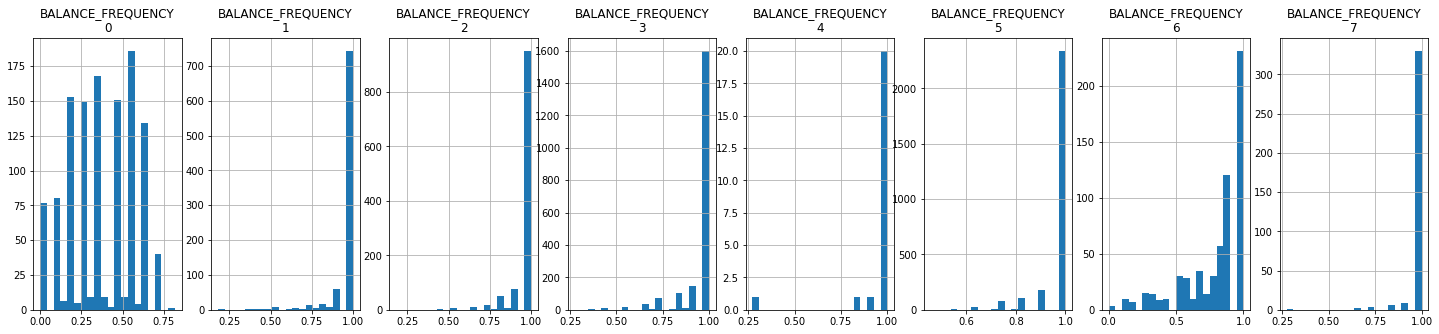

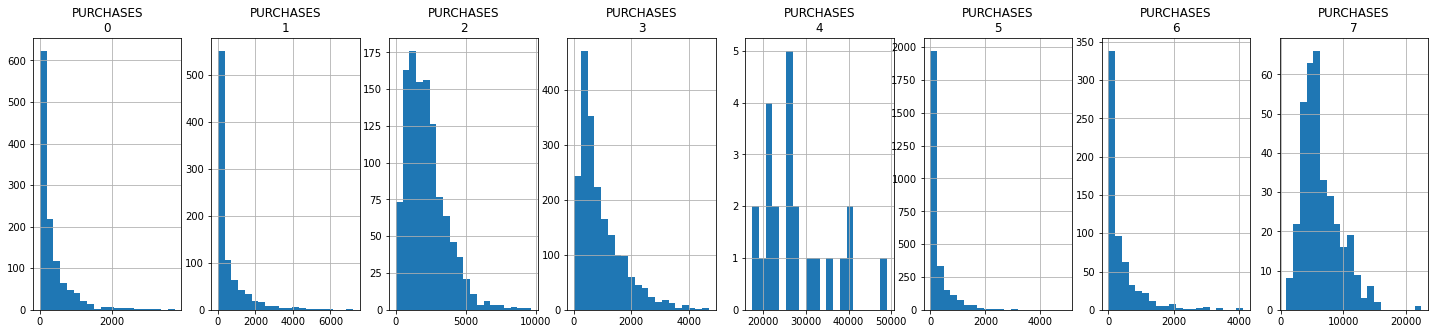

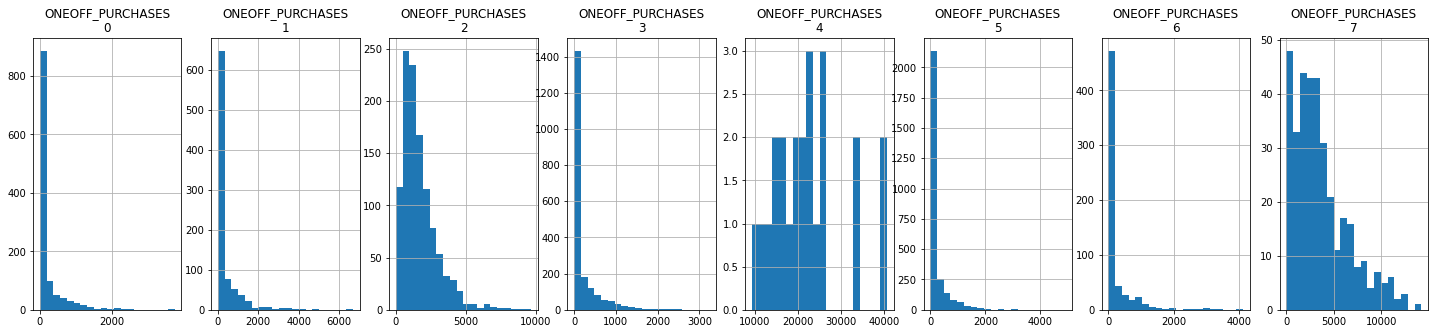

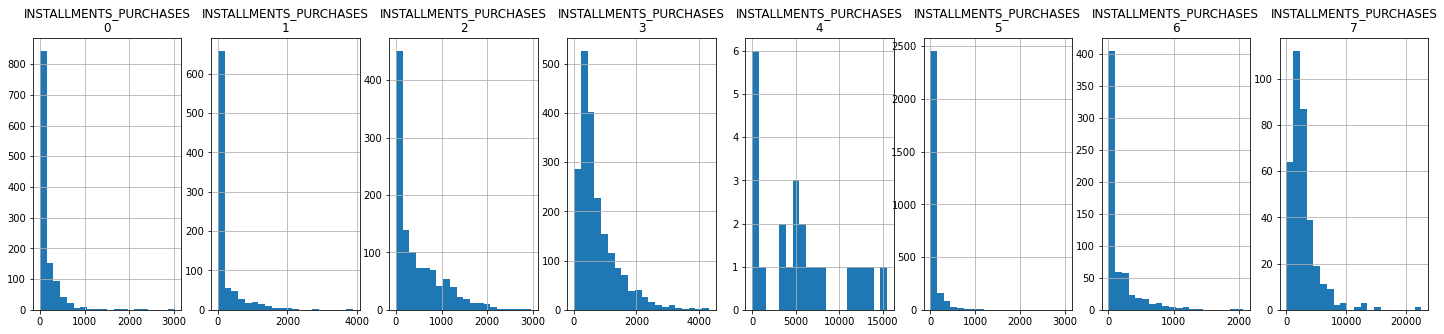

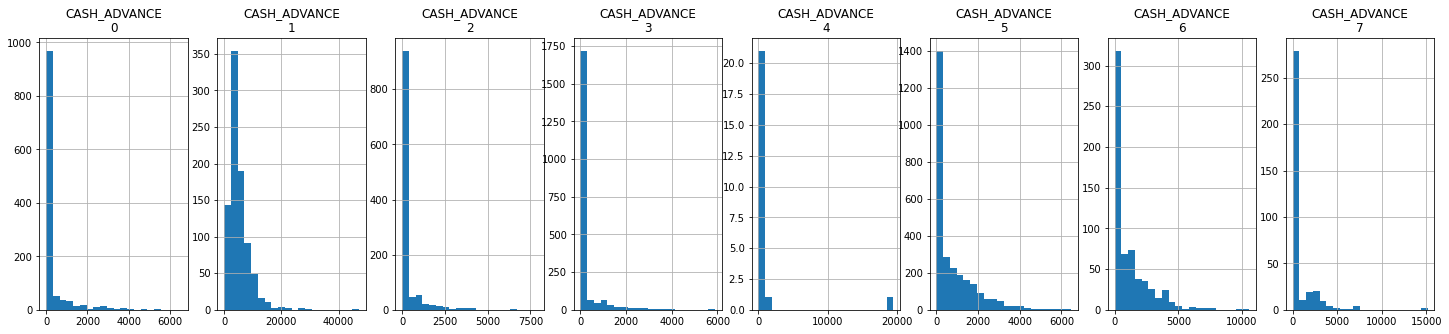

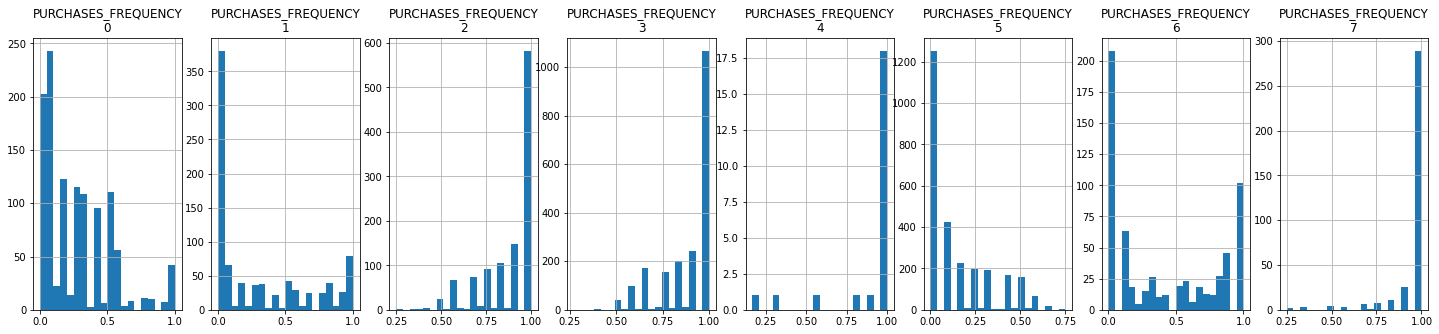

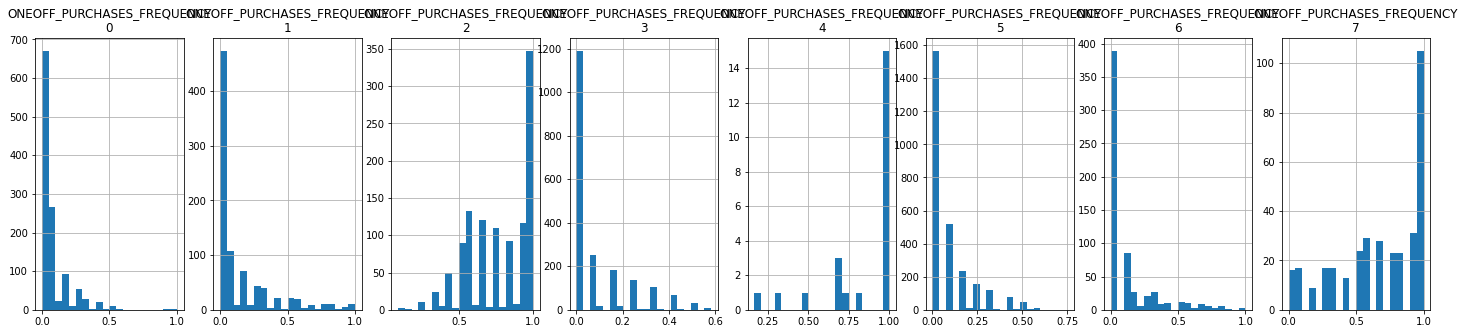

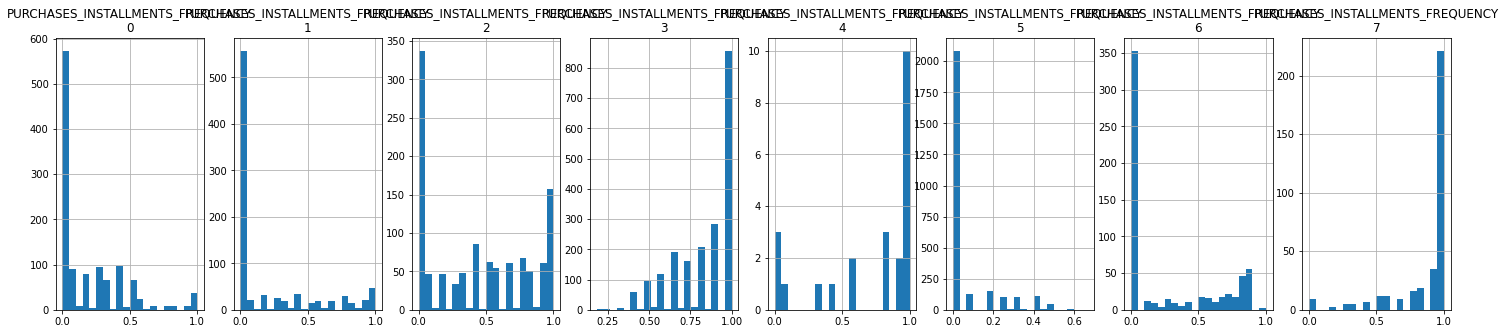

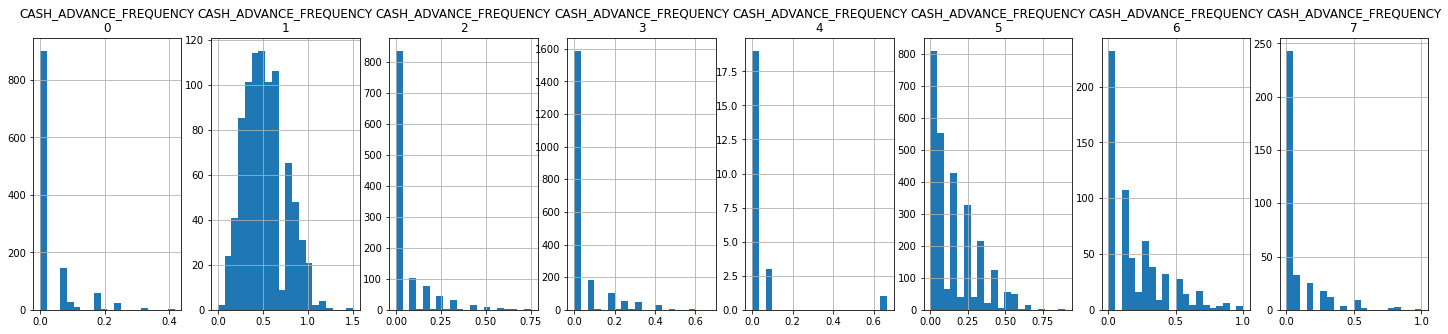

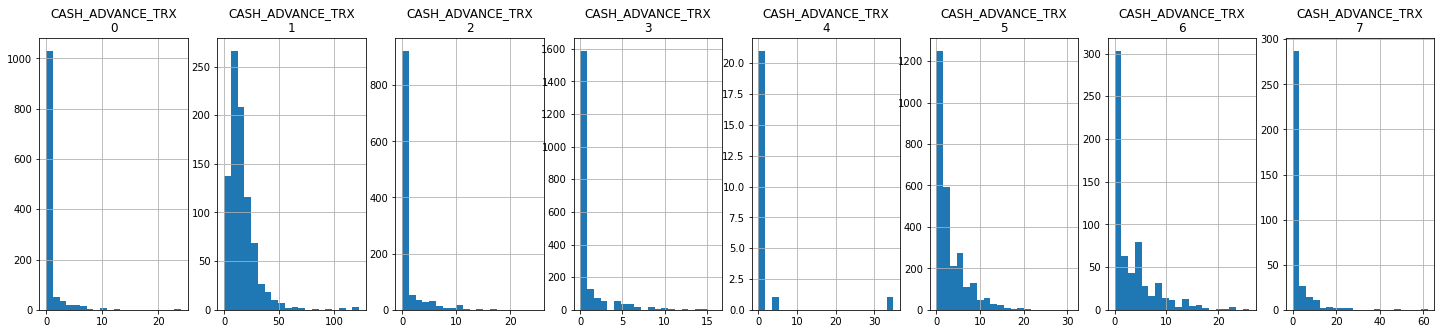

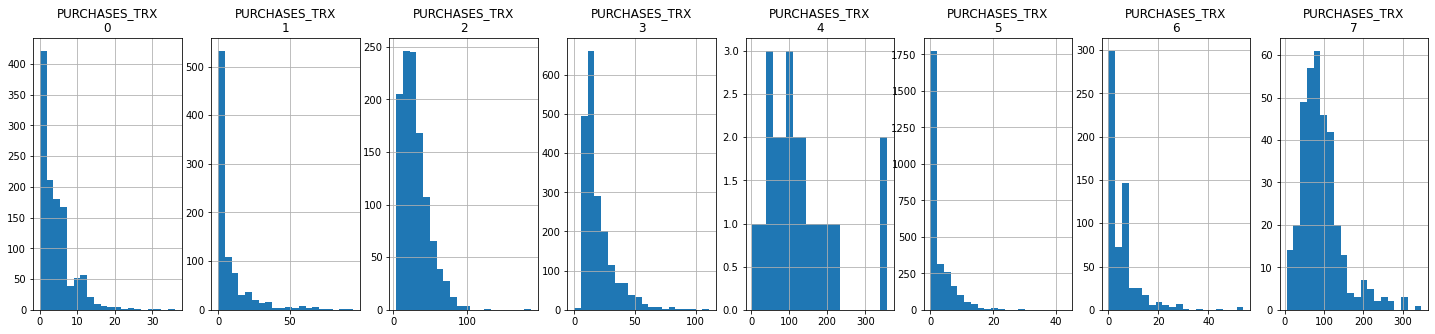

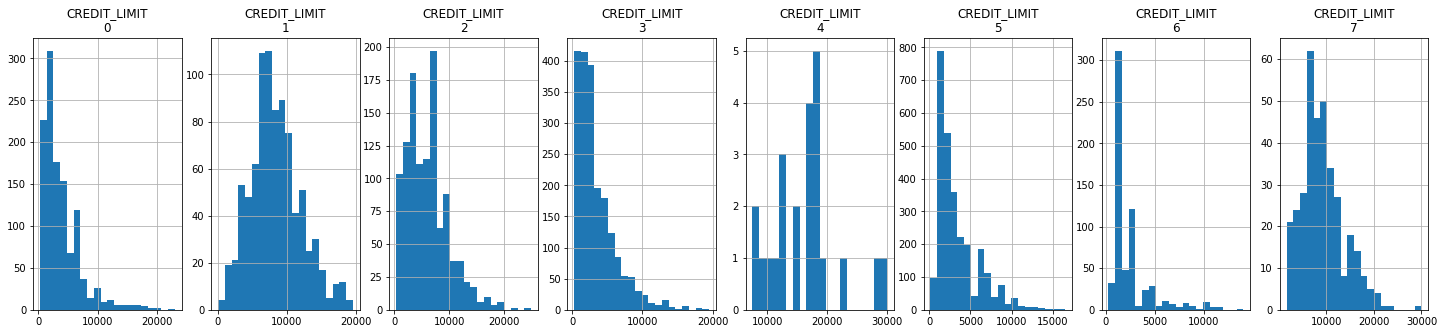

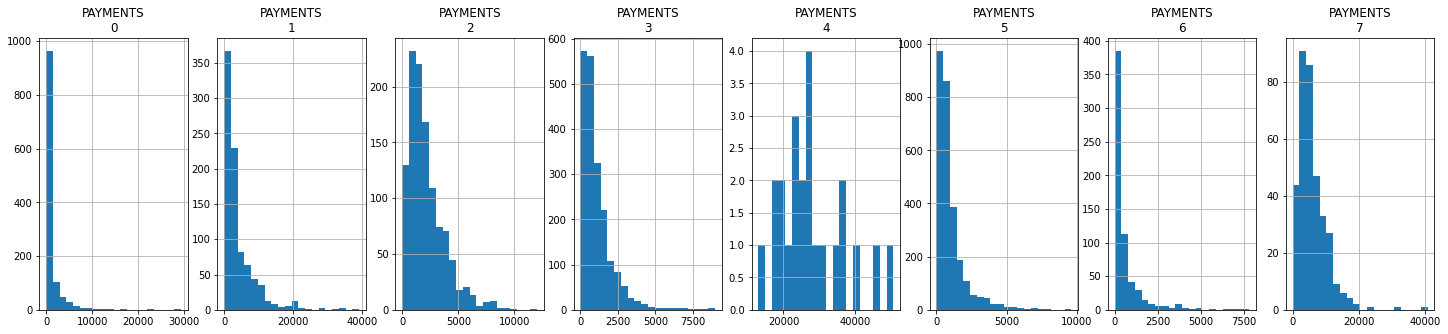

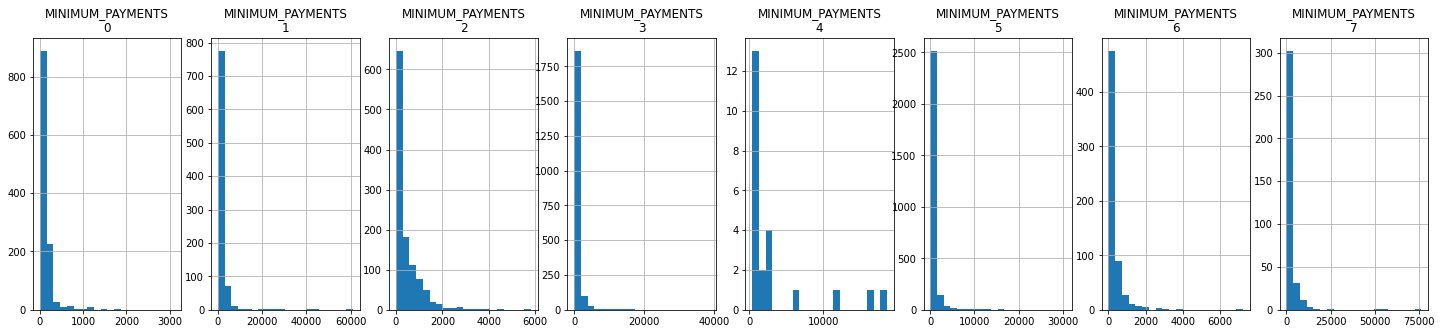

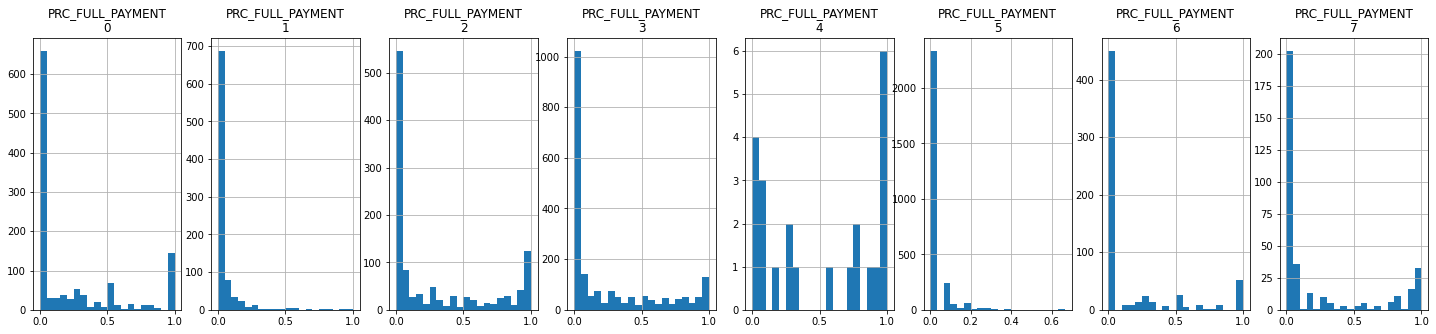

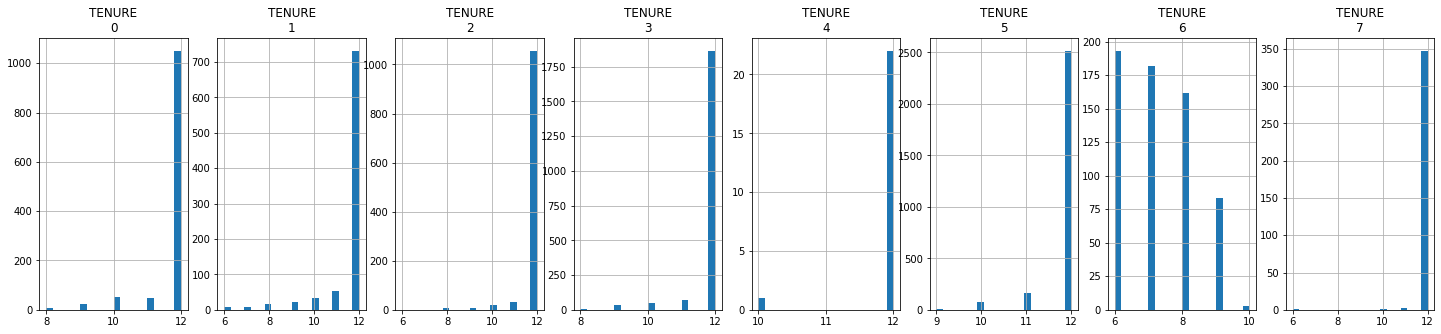

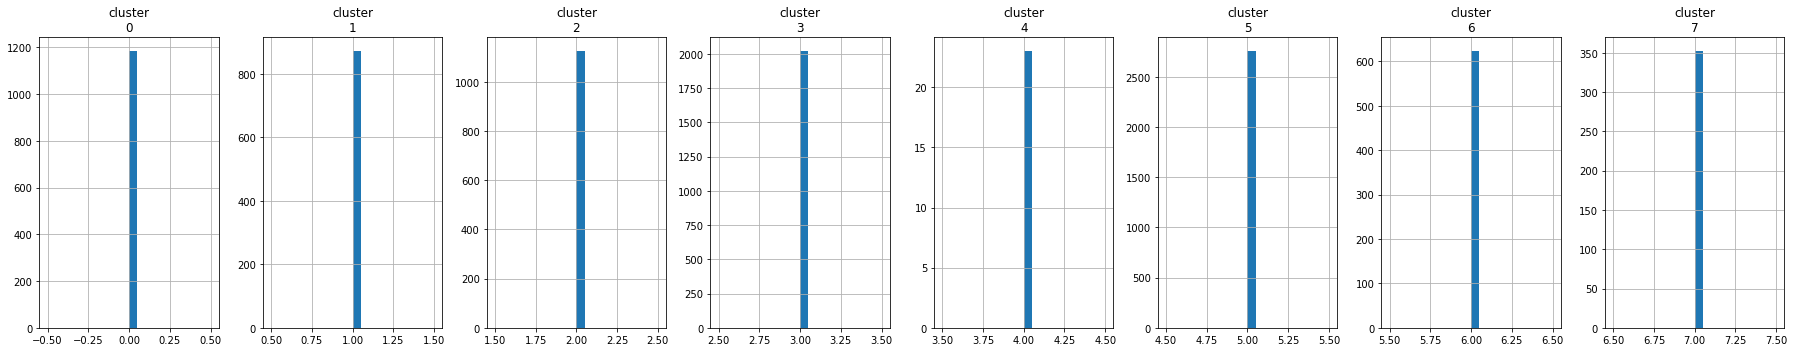

In [130]:
draw_clusters(data_cluster,8)

In [131]:
pca_df_2

,pca1,pca2,cluster
0,-1.422682,-0.164419,1
1,-0.064554,1.512590,1
2,-0.209864,-0.072104,1
3,-0.371472,-0.533955,1
4,-1.217568,-0.020247,1
...,...,...,...
8945,-0.849047,-0.322490,1
8946,-1.063734,0.019921,1
8947,-1.213544,-0.186322,1
8948,-1.451461,-0.239329,1


In [132]:
pca_df_3 = principal_component_analysis(2, data_fully_scaled)

In [133]:
pca_df_3

array([[-1.68433605, -1.06995634],
       [-1.13186481,  2.51054289],
       [ 0.96920513, -0.38350571],
       ...,
       [-0.93031466, -1.80640304],
       [-2.33838833, -0.6511053 ],
       [-0.55876288, -0.40050611]])

In [134]:
pca_df_3 = pd.DataFrame(data = pca_df_3, columns=['pca_1','pca_2'])

In [135]:
pca_df_3

,pca_1,pca_2
0,-1.684336,-1.069956
1,-1.131865,2.510543
2,0.969205,-0.383506
3,-0.897083,-0.017526
4,-1.600262,-0.681199
...,...,...
8945,-0.363972,-2.011770
8946,-0.590490,-1.696626
8947,-0.930315,-1.806403
8948,-2.338388,-0.651105


In [136]:
pca_df_3 = convert_pca_dataframe(pca_df_3, labels)

In [137]:
pca_df_3

,pca_1,pca_2,cluster
0,-1.684336,-1.069956,5
1,-1.131865,2.510543,1
2,0.969205,-0.383506,2
3,-0.897083,-0.017526,5
4,-1.600262,-0.681199,5
...,...,...,...
8945,-0.363972,-2.011770,6
8946,-0.590490,-1.696626,6
8947,-0.930315,-1.806403,6
8948,-2.338388,-0.651105,6


enter the number of clusters: 8


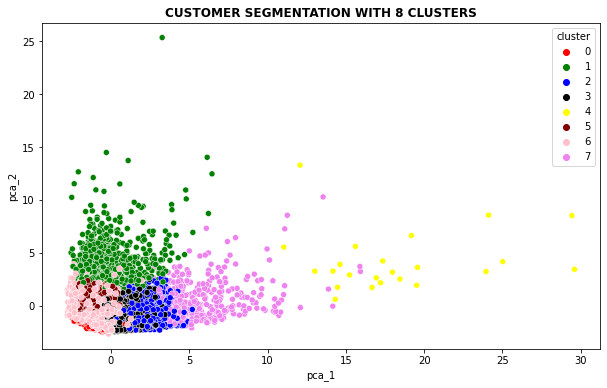

In [142]:
plot_for_segmentation(pca_df_3,'pca_1','pca_2','cluster')

In [167]:
# Model Architecture
input_shape = Input(shape=(17,))

X = Dense(7, activation='relu') (input_shape)
X = Dense(500, activation='relu', kernel_initializer='glorot_uniform') (X)
X = Dense(500, activation='relu', kernel_initializer='glorot_uniform') (X)
X = Dense(2000, activation='relu', kernel_initializer='glorot_uniform') (X)

# encoded_layer
encoded = Dense(11, activation='relu', kernel_initializer='glorot_uniform') (X)

X = Dense(2000, activation='relu', kernel_initializer='glorot_uniform') (encoded)
X = Dense(500, activation='relu', kernel_initializer='glorot_uniform') (X)

# decoded layer
decoded = Dense(17, activation='relu') (X)




In [168]:
auto_encode_2 = Model(input_shape, decoded)

In [169]:
encoded_2 = Model(input_shape, encoded)

In [170]:
auto_encode_2.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [171]:
history_2 = auto_encode_2.fit(data_fully_scaled, data_fully_scaled, batch_size=108, epochs=100, verbose=1)

Epoch 1/100
83/83 [==============================] - 1s 3ms/step - loss: 0.6669 - accuracy: 0.4196
Epoch 2/100
83/83 [==============================] - 0s 3ms/step - loss: 0.5636 - accuracy: 0.5120
Epoch 3/100
83/83 [==============================] - 0s 3ms/step - loss: 0.5253 - accuracy: 0.5523
Epoch 4/100
83/83 [==============================] - 0s 3ms/step - loss: 0.5002 - accuracy: 0.5797
Epoch 5/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4830 - accuracy: 0.6060
Epoch 6/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4881 - accuracy: 0.6063
Epoch 7/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4684 - accuracy: 0.6302
Epoch 8/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4654 - accuracy: 0.6399
Epoch 9/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4597 - accuracy: 0.6469
Epoch 10/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4564 - accuracy: 0.6571
Epoch 11/

In [172]:
pred = encoded_2.predict(data_fully_scaled)

In [173]:
pred

array([[0.0000000e+00, 1.2335549e-01, 0.0000000e+00, ..., 1.4173825e-01,
        0.0000000e+00, 1.5531680e-01],
       [0.0000000e+00, 1.3124520e+00, 0.0000000e+00, ..., 1.9185408e+00,
        4.7887233e-01, 4.3986028e-01],
       [6.3058174e-01, 3.7674892e-01, 0.0000000e+00, ..., 3.7518126e-01,
        1.9245560e+00, 1.2324151e+00],
       ...,
       [2.9396296e-01, 0.0000000e+00, 0.0000000e+00, ..., 9.7514316e-03,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.6723350e-01, 0.0000000e+00, ..., 0.0000000e+00,
        4.6730228e-03, 2.8080529e-01],
       [2.4085262e-01, 4.8675027e-01, 0.0000000e+00, ..., 9.5460564e-04,
        2.0018266e-01, 7.2242683e-01]], dtype=float32)

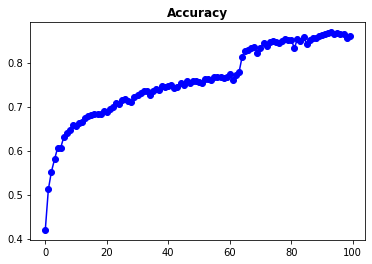

In [194]:
plt.plot(history_2.history['accuracy'],'bo-')
plt.title('Accuracy', weight='bold');

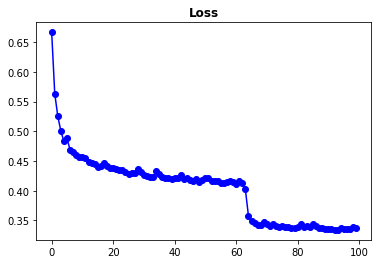

In [195]:
plt.plot(history_2.history['loss'],'bo-')
plt.title('Loss', weight='bold');

In [174]:
score_3 = elbow_method(pred)

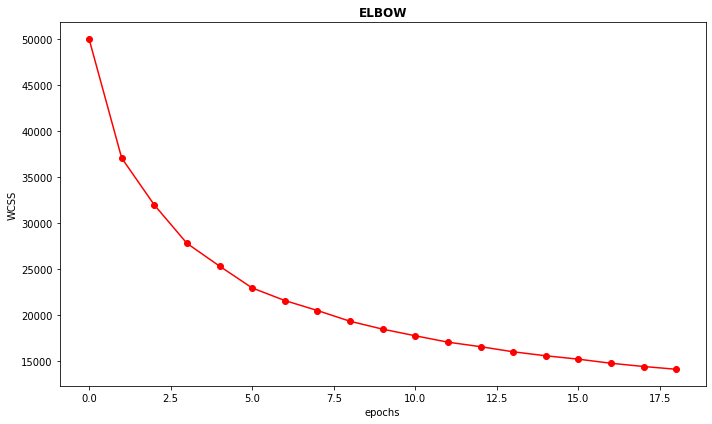

In [175]:
elbow_draw(score_3,'ELBOW')

In [176]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(pred)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [177]:
labeL_2 = kmeans.labels_

In [178]:
labeL_2

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


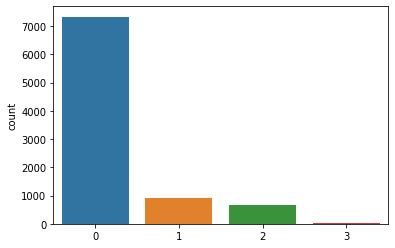

In [180]:
sns.countplot(labeL_2)

In [182]:
data_cluster_2 = data_with_clos(data_2, labeL_2)

In [183]:
data_cluster_2

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,0.000000,0.000000,6,0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


In [184]:
pca_df_4 = principal_component_analysis(2,pred)

In [185]:
pca_df_4

array([[-1.2773368 , -0.1120372 ],
       [ 0.527592  ,  0.8886447 ],
       [ 0.45297068, -0.5335616 ],
       ...,
       [-1.1932925 , -0.04765896],
       [-1.1813061 ,  0.0350038 ],
       [-0.83051676, -0.25253516]], dtype=float32)

In [186]:
pca_df_4 = pd.DataFrame(data = pca_df_4, columns=['pca_1','pca_2'])

In [187]:
pca_df_4

,pca_1,pca_2
0,-1.277337,-0.112037
1,0.527592,0.888645
2,0.452971,-0.533562
3,-0.461083,-0.223496
4,-1.088909,-0.050061
...,...,...
8945,-0.879567,-0.233091
8946,-1.003458,-0.105015
8947,-1.193292,-0.047659
8948,-1.181306,0.035004


In [188]:
pca_df_4 = convert_pca_dataframe(pca_df_4, labeL_2)

In [189]:
pca_df_4

,pca_1,pca_2,cluster
0,-1.277337,-0.112037,0
1,0.527592,0.888645,0
2,0.452971,-0.533562,0
3,-0.461083,-0.223496,0
4,-1.088909,-0.050061,0
...,...,...,...
8945,-0.879567,-0.233091,0
8946,-1.003458,-0.105015,0
8947,-1.193292,-0.047659,0
8948,-1.181306,0.035004,0


enter the number of clusters: 4


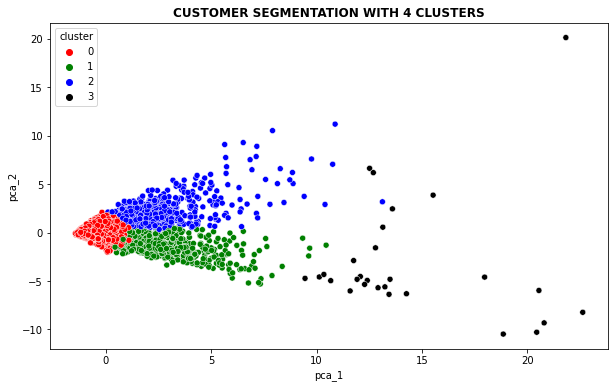

In [190]:
plot_for_segmentation(pca_df_4, 'pca_1','pca_2','cluster')